Time Series Analysis

By-
Cheshta
102083058
COE7


Here, I have used three models, calculated their RMSE values for given dataset and the one having the least RMSE is chosen. Later, results are plotted between true values and predictions for the best model. 

In [60]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

Three models that I have compared RMSE values of are:
1. LightGBM Regressor
2. Random Forest Regressor
3. Extra Trees Regressor

In [62]:
df = pd.read_excel('DATASET.xlsx')

In [63]:
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [64]:
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10

In [65]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Section')

In [66]:
df.fillna(0, inplace=True)

In [67]:
test = df.loc[df['year'] == 10]
test

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [68]:
test.columns = test.columns.str.replace('Unnamed: 0', 'Section')

In [69]:
model1 = ExtraTreesRegressor(n_estimators=200, max_features='auto', max_leaf_nodes=1000, random_state=67,
                             criterion='mse', max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.1, bootstrap=False, n_jobs=None, oob_score=False, 
                             verbose=0, warm_start=False)

In [75]:
model2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [76]:
model3 = LGBMRegressor(random_state=19)

In [77]:
predict_cols = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [78]:
res1 = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [79]:
res2 = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [80]:
res3 = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [81]:
def model_choose(val):
    RMSE = []
    N = 0
    index = 0
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            sol = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                model1.fit(xtrain, ytrain)
                ypred = model1.predict(xtest.reshape(1,-1))[0]

                res1[predict_cols[index]].append(ypred)
                sol += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(sol)
            index += 1

       
    elif (val==1):
        for j in [10, 11, 12, 13, 14]:
            sol = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]
                 
                model2.fit(xtrain, ytrain)
                ypred = model2.predict(xtest.reshape(1,-1))[0]

                res2[predict_cols[index]].append(ypred)
                sol += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(sol)
            index += 1
    else:
      for j in [10, 11, 12, 13, 14]:
            sol = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                model3.fit(xtrain, ytrain)
                ypred = model3.predict(xtest.reshape(1,-1))[0]

                res3[predict_cols[index]].append(ypred)
                sol += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(sol)
            index += 1
        
    return (RMSE, count)

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
res_RMSE1, res_count1 = model_choose(0)

In [84]:
res_RMSE2, res_count2 = model_choose(1)

In [85]:
res_RMSE3, res_count3 = model_choose(2)

In [86]:
#RMSE for each column
for i in res_RMSE1:
    print((i/res_count1)**0.5)

61.728737479069046
65.5600337193896
25.9689601904851
14.530292392102782
0.30080263006538455


In [87]:
#RMSE for each column
for i in res_RMSE2:
    print((i/res_count2)**0.5)

69.46258639071974
70.0759035409492
28.063391114998907
15.053109911576412
0.30160469735033363


In [88]:
#RMSE for each column
for i in res_RMSE3:
    print((i/res_count3)**0.5)

97.15405541798003
105.38390087117291
46.300027795178536
18.70407957084745
0.420822084543291


In [89]:
res_RMSE1

[381043.70307598234,
 429811.80212874996,
 67438.68933749999,
 21112.9397,
 9.04822222542526]

In [90]:
res_RMSE2

[482505.09080882027,
 491063.2257080416,
 78755.39208733996,
 22659.611801000003,
 9.096539346378634]

In [91]:
res_RMSE3

[943891.0484159936,
 1110576.65628252,
 214369.2573834305,
 34984.2592592593,
 17.709122683936076]

In [92]:
#Total RMSE
print((sum(res_RMSE1)/500)**0.5)

42.412643927594466


In [93]:
#Total RMSE
print((sum(res_RMSE2)/500)**0.5)

46.367928936810365


In [94]:
#Total RMSE
print((sum(res_RMSE3)/500)**0.5)

67.87987817407877


Now we see model 1, Extra Trees Regressor, is the best out of three.

In [95]:
datapredicted = pd.DataFrame.from_dict(res1)
datapredicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.0955,58.2220,48.450,7.975,1.909800
1,58.5875,28.8200,0.900,7.865,0.792305
2,71.0200,0.0000,0.000,13.680,1.376575
3,20.1465,54.7580,57.875,7.425,1.862195
4,0.0000,258.5060,33.965,5.975,1.757360
...,...,...,...,...,...
95,0.0000,102.3395,14.375,3.890,1.349830
96,89.7835,157.4145,4.360,5.880,1.353915
97,0.0500,27.1590,13.880,10.110,1.033160
98,48.5480,28.8390,7.525,9.430,0.777645


Plots

In [96]:
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))
#40 random rows selected

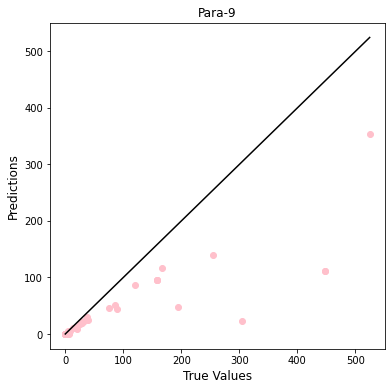

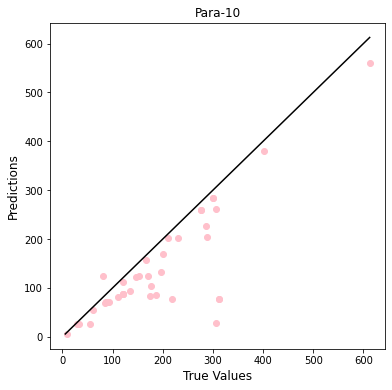

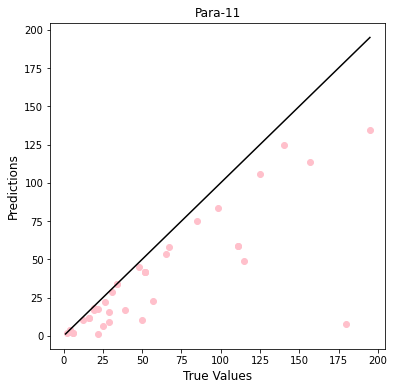

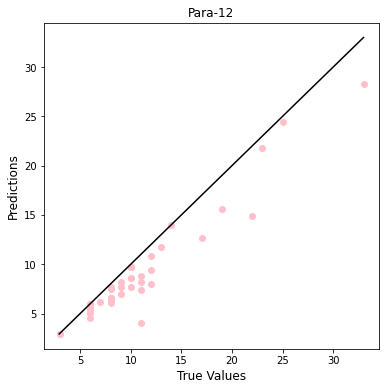

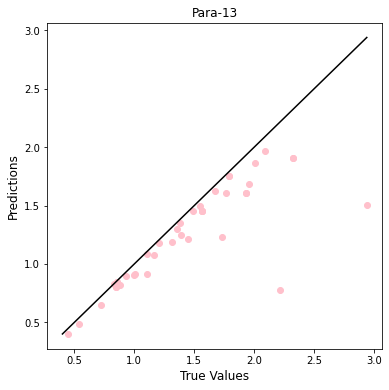

In [103]:
for i in range(5):
    plt.figure(figsize=(6,6))
    true = test.iloc[ind, i+10]
    predicted = datapredicted.iloc[ind, i]
    plt.scatter(true, predicted, c='pink')

    plot1 = max(max(predicted), max(true))
    plot2 = min(min(predicted), min(true))
    plt.plot([plot1, plot2], [plot1, plot2], 'black')
    plt.title(predict_cols[i])
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predictions', fontsize=12)
    plt.show()